#Part 1

stage 1:

 NLP-powered Job Descriptions and Posting:
Skill and Requirement Extraction: NLP techniques like topic modeling and named entity recognition pinpoint crucial skills, qualifications, and experience the role demands.

Job Posting Optimization: NLP generates keywords and optimizes descriptions for search engines and online platforms, ensuring your ideal candidate finds you.


here we have discussed 2 ways of doing the skill and keyword extraction

1. with spacy

In [ ]:
import spacy
from spacy.matcher import Matcher

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Define distinct patterns for bias detection and skill extraction
matcher = Matcher(nlp.vocab)
bias_patterns = [
    [{"LOWER": "unique voice"}],  # Example bias-flagged phrase
]
skill_patterns = [
    [{"POS": "NOUN"}, {"POS": "NOUN"}],  # Pattern for skill extraction
]
matcher.add("bias", bias_patterns)
matcher.add("skills", skill_patterns)

# Input job description
job_description = """
... (At EY, you’ll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you. And we’re counting on your unique voice and perspective to help EY become even better, too. Join us and build an exceptional experience for yourself, and a better working world for all.

Position: Senior(Data Science)

Education: B.Tech/M.Tech/Masters/PhD

Experience

5 - 8 years of experience.
Should have had hands on experience in ML/ Advanced Analytics
Hands on AI projects would be preferred
Should have had experience in external client facing roles
Good communication skill

Key Responsibilities

Hands-on work and delivery of Advanced analytics/ML/AI projects
Handle client interactions and client management
Mentoring of the juniors

Qualifications, Education And Certification

B.Tech / M.Tech /Masters/ PhD in Statistics, Economics, Computer Science, Robotics, Industrial or Mechanical Engineering or related areas
Excellent knowledge in statistical techniques and advanced machine learning algorithms - regression, classification, clustering, decision trees etc
Expert in PySpark/Python/R coding
Knowledge in Time Series Forecasting, Databricks would be an added advantage
Knowledge in Neural Networks/ Deep Learning/ AI would be added advantage
Excellent communication, consulting & project management skills
) ...
"""

# Process job description
doc = nlp(job_description)

# Extract skills and requirements
skills = []
for match_id, start, end in matcher(doc):
    if nlp.vocab.strings[match_id] == "skills":
        skill_phrase = doc[start:end].text
        skills.append(skill_phrase)

# Detect bias phrases and suggest alternatives
bias_phrases = []
for match_id, start, end in matcher(doc):
    if nlp.vocab.strings[match_id] == "bias":
        bias_phrase = doc[start:end].text
        bias_phrases.append(bias_phrase)

        # Suggest alternatives (example)
        alternative = "diverse perspectives"
        print(f"Bias flagged: {bias_phrase}. Suggested alternative: {alternative}")

# Generate keywords for SEO
keywords = [w.text for w in doc if not w.is_stop and w.pos_ in ["NOUN", "PROPN"]]

# Print results in a numbered, readable format
print("\n**Extracted Skills and Requirements:**")
for i, skill in enumerate(skills, 1):
    print(f"{i}. {skill}")

print("\n**Bias-Flagged Phrases:**")
for i, bias_phrase in enumerate(bias_phrases, 1):
    print(f"{i}. {bias_phrase}")

print("\n**Keywords for SEO:**")
for i, keyword in enumerate(keywords, 1):
    print(f"{i}. {keyword}")



**Extracted Skills and Requirements:**
1. client facing
2. facing roles
3. communication skill
4. client interactions
5. client management
6. /Masters/ PhD
7. decision trees
8. project management
9. management skills

**Bias-Flagged Phrases:**

**Keywords for SEO:**
1. EY
2. chance
3. career
4. scale
5. support
6. culture
7. technology
8. version
9. voice
10. perspective
11. experience
12. world
13. Position
14. Senior(Data
15. Science
16. Education
17. B.Tech
18. M.Tech
19. Masters
20. PhD
21. Experience
22. years
23. experience
24. hands
25. experience
26. ML/
27. Advanced
28. Analytics
29. Hands
30. AI
31. projects
32. experience
33. client
34. facing
35. roles
36. communication
37. skill
38. Key
39. Responsibilities
40. Hands
41. work
42. delivery
43. Advanced
44. analytics
45. ML
46. AI
47. projects
48. Handle
49. client
50. interactions
51. client
52. management
53. Mentoring
54. juniors
55. Qualifications
56. Education
57. Certification
58. B.Tech
59. M.Tech
60. /Masters/
61. P

In [ ]:
pip install yake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.5 MB/s eta 0:00:00


2. with yake key word extarctor

In [ ]:
from yake import KeywordExtractor

text = """At EY, you’ll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you. And we’re counting on your unique voice and perspective to help EY become even better, too. Join us and build an exceptional experience for yourself, and a better working world for all.

Position: Senior(Data Science)

Education: B.Tech/M.Tech/Masters/PhD

Experience

5 - 8 years of experience.
Should have had hands on experience in ML/ Advanced Analytics
Hands on AI projects would be preferred
Should have had experience in external client facing roles
Good communication skill

Key Responsibilities

Hands-on work and delivery of Advanced analytics/ML/AI projects
Handle client interactions and client management
Mentoring of the juniors

Qualifications, Education And Certification

B.Tech / M.Tech /Masters/ PhD in Statistics, Economics, Computer Science, Robotics, Industrial or Mechanical Engineering or related areas
Excellent knowledge in statistical techniques and advanced machine learning algorithms - regression, classification, clustering, decision trees etc
Expert in PySpark/Python/R coding
Knowledge in Time Series Forecasting, Databricks would be an added advantage
Knowledge in Neural Networks/ Deep Learning/ AI would be added advantage
Excellent communication, consulting & project management skills"""

kw_extractor = KeywordExtractor(lan="en", n=3)  # Extract top 3 keywords
keywords = kw_extractor.extract_keywords(text)
print(keywords)  # Output: ['natural language processing', 'SEO', 'text']



[('global scale', 0.0346019477955046), ('inclusive culture', 0.0346019477955046), ('culture and technology', 0.04066898916108991), ('Advanced Analytics', 0.07667464972130905), ('experience', 0.07952953102374018), ('Data Science', 0.10347571250359243), ('Key Responsibilities Hands-on', 0.10885317028369856), ('Masters', 0.12660738563523946), ('Advanced', 0.12909125011497302), ('career as unique', 0.13151246170546435), ('support', 0.14158796150409042), ('Computer Science', 0.14323700719402963), ('unique', 0.14596770014086236), ('Time Series Forecasting', 0.14866463215541353), ('unique voice', 0.15556294553982497), ('Science', 0.15637252710961325), ('Education', 0.15637252710961325), ('chance to build', 0.16433793066203503), ('build a career', 0.16433793066203503), ('scale', 0.16918111094516422)]


Stage 2 : Resume screening

In [ ]:
import re

def parse_resume(resume_text):
  """
  Parses a resume text and extracts keywords related to skills, education, and experience.

  Args:
      resume_text: The resume text as a string.

  Returns:
      A dictionary containing extracted keywords.
  """
  keywords = {
    "education": [],
    "skills": [],
    "experience": [],
    "projects": [],
    "interests": [],
    "highlights": [],
  }

  # Extract education details
  education_pattern = r"Bachelor of Technology.*?in (.*?), (.*?) University.*?Expected (\d{4})"
  match = re.search(education_pattern, resume_text, re.DOTALL)
  if match:
    keywords["education"].append(f"{match.group(1)} ({match.group(2)})")

  # Extract skills (technical and soft skills)
  skills_pattern = r"(Technical Skills|Soft Skills).*?([\w, ]+)"
  for match in re.findall(skills_pattern, resume_text, re.DOTALL | re.IGNORECASE):
    keywords[match[0].lower().split(" ")[1]] += match[1].split(", ")

  # Extract experience details (company, title, dates)
  experience_pattern = r"(.*?) Intern.*?(\w+ \d{4} - \w+ \d{4})|intern.*?(\w+ \d{4} - \w+ \d{4})"
  for match in re.findall(experience_pattern, resume_text):
    company_title = match[0] if match[0] else match[4]
    dates = match[1] if match[1] else match[5]
    keywords["experience"].append({"company": company_title, "dates": dates})

  # Extract project titles
  project_pattern = r"PROJECTS\n(.*?)\. Led|PROJECTS\n(.*?)$"
  for match in re.findall(project_pattern, resume_text, re.DOTALL):
    keywords["projects"].append(match[0].strip())

  # Extract interests (using Other Interests section)
  interests_pattern = r"Other Interests\n(.*?)$"
  match = re.search(interests_pattern, resume_text, re.DOTALL)
  if match:
    keywords["interests"] += match.group(1).split(", ")

  # Extract highlights (using NOTABLE HIGHLIGHTS section)
  highlights_pattern = r"NOTABLE HIGHLIGHTS\n(.*?)$"
  match = re.search(highlights_pattern, resume_text, re.DOTALL)
  if match:
    keywords["highlights"] += match.group(1).split("\n• ")

  return keywords

# Example usage
resume_text = """
ANUNAY SINGH
+91 8210586507 // anunay.singh02@gmail.com

EDUCATION
Bachelor of Technology in Computer Science, SRM University (Expected 2024) - GPA: 8.95

SKILLS
Technical Skills: C/C++, Python, Kotlin, Java, SQL, HTML, CSS, Dart, Flutter, JavaScript, Oracle
Soft Skills: Problem Solving, Critical Thinking, Leadership Qualities, Team Player Abilities, Communication Skills

EXPERIENCE
Decision Analytics Associate Intern (Jan 2024 - Present)
ZS Associates, Pune

Machine Learning Intern (Jul 2023 - Sept 2023)
TATA ELXSI, Bangalore
  * Acquired hands-on experience in NLP projects, gaining proficiency in text analysis, processing, and modeling to solve complex challenges.
  * Deployed models like Falcon, MPT, Flan, and gpt-2, using the Huggingface open-source platform.

Intern (Dec 2022 - Jan 2023)
Maximizer Innovations, New Delhi
  * Assisted in development, monitored and resolved technical support requests.
  * Configured and maintained various hardware and software resources.

PROJECTS
NLP powered Talent Acquisition and Management. Led the development and current patent application of a novel NLP-based job recruitment and employee management system. This system automates resume screening, skills matching, and sentiment analysis, significantly improving hiring efficiency and employee engagement.

Test case generation by Fine tuning LLMs. Implemented and evaluated fine-tuning techniques for GPT-2 on software requirements and code, enabling generation of diverse and realistic test cases. This research contributed to the field of NLP-driven testing and demonstrated my expertise in advanced language models. (Check here)

Prim’s Algorithm for Cable Management. The problem deliberated is that of networking a given set of network nodes with shortest possible cables of direct links. (Check here)

NOTABLE HIGHLIGHTS
* Weekly AI Research Review
* My Portfolio
* 700+ contributions on Github
* Collaborated with my professors for 2 different projects
* Served as the Academics Captain, Chief School Ambassador in School and as a Teaching Assistant in college
* Certificates for Organizational Analysis, Metaverse, Oracle Database 12c: SQL Fundaments
* Two volunteering internships for NGOs
* Played Basketball and Football at National and Zonal level respectively
"""

keywords = parse_resume(resume_text)

print("Extracted Keywords:")
for section, section_keywords in keywords.items():
  if section_keywords:
    print(f"\t- {section.title()}:")
    for keyword in section_keywords:
      print(f"\t\t- {keyword}")



Extracted Keywords:
	- Education:
		- Computer Science (SRM)
	- Skills:
		-  C
		-  Problem Solving
		- Critical Thinking
		- Leadership Qualities
		- Team Player Abilities
		- Communication Skills
	- Experience:
		- {'company': 'Machine Learning', 'dates': 'Jul 2023 - Sept 2023'}
	- Projects:
		- NLP powered Talent Acquisition and Management
	- Highlights:
		- * Weekly AI Research Review
* My Portfolio
* 700+ contributions on Github
* Collaborated with my professors for 2 different projects
* Served as the Academics Captain, Chief School Ambassador in School and as a Teaching Assistant in college
* Certificates for Organizational Analysis, Metaverse, Oracle Database 12c: SQL Fundaments
* Two volunteering internships for NGOs
* Played Basketball and Football at National and Zonal level respectively


###Bias Detection :
our process is coded in a way such that no candidate face any bias at any step of the prcoess. There is just a example how bias is detected in any recuirtment process. If needed in the future we will add this element to it as well.



In [ ]:
import re

def detect_gender_bias(resume_text):
    gender_keywords = ['male', 'female', 'man', 'woman']
    bias_count = 0
    for keyword in gender_keywords:
        if re.search(r'\b' + keyword + r'\b', resume_text, re.IGNORECASE):
            bias_count += 1
    return bias_count

def detect_age_bias(resume_text):
    age_keywords = ['young', 'old', 'mature', 'youthful']
    bias_count = 0
    for keyword in age_keywords:
        if re.search(r'\b' + keyword + r'\b', resume_text, re.IGNORECASE):
            bias_count += 1
    return bias_count

def detect_ethnicity_bias(resume_text):
    ethnicity_keywords = ['white', 'black', 'asian', 'hispanic']
    bias_count = 0
    for keyword in ethnicity_keywords:
        if re.search(r'\b' + keyword + r'\b', resume_text, re.IGNORECASE):
            bias_count += 1
    return bias_count

def main():
    resume_text = """[Insert resume text here]"""

    gender_bias_count = detect_gender_bias(resume_text)
    age_bias_count = detect_age_bias(resume_text)
    ethnicity_bias_count = detect_ethnicity_bias(resume_text)

    print("Gender bias count:", gender_bias_count)
    print("Age bias count:", age_bias_count)
    print("Ethnicity bias count:", ethnicity_bias_count)

if __name__ == "__main__":
    main()


Gender bias count: 0
Age bias count: 0
Ethnicity bias count: 0


Stage 3 : Finding the perfect candidate.

Text Similarity Measures: Find the closest match! NLP techniques like cosine similarity or TF-IDF measure the degree of alignment between candidate skills and job requirements. Cultural Fit Assessment: Look beyond just skills! Analyze additional information like cover letters and social media profiles (with consent) to assess soft skills and cultural fit through sentiment analysis and topic modeling. Shortlist Ranking and Recommendation: Make informed decisions! Combine NLP-based insights with other assessment results to rank and recommend the most qualified and suitable candidates for interviews.

1. comparing similarities

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample job description (unchanged)
job_description = "Seeking Python developer with experience in machine learning and data analysis. Familiarity with cloud platforms like AWS is a plus."

# Different resume texts
resume_texts = [
    "Experienced Python developer with 5+ years in machine learning and deep learning. Extensive experience with AWS and cloud infrastructure.",  # Highly relevant candidate
    "Web developer with experience in HTML, CSS, and JavaScript. Some experience with Python for automation tasks.",  # Less relevant candidate
    "Data scientist with expertise in statistics and data visualization. Limited Python experience, mainly for data manipulation.",  # Moderately relevant candidate
]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Process each candidate
for i, resume_text in enumerate(resume_texts):
    # Convert text to vectors
    job_vector = vectorizer.fit_transform([job_description])
    resume_vector = vectorizer.transform([resume_text])

    # Calculate cosine similarity
    similarity = job_vector.dot(resume_vector.T)[0, 0]

    # Print results and interpretation
    print(f"\nCandidate {i+1}:")
    print(resume_text)

    print(f"\nSimilarity Score: {similarity:.2f}")

    if similarity > 0.7:
        print("\nThis candidate's skills seem highly aligned with the job description. Recommend for further evaluation!")
    elif similarity > 0.5:
        print("\nThis candidate shows promising skills, but may require additional experience in specific areas. Consider further evaluation based on other factors.")
    else:
        print("\nThis candidate's skills might not be a perfect match for this job. Focus on other candidates with closer alignment.")




Candidate 1:
Experienced Python developer with 5+ years in machine learning and deep learning. Extensive experience with AWS and cloud infrastructure.

Similarity Score: 0.75

This candidate's skills seem highly aligned with the job description. Recommend for further evaluation!

Candidate 2:
Web developer with experience in HTML, CSS, and JavaScript. Some experience with Python for automation tasks.

Similarity Score: 0.63

This candidate shows promising skills, but may require additional experience in specific areas. Consider further evaluation based on other factors.

Candidate 3:
Data scientist with expertise in statistics and data visualization. Limited Python experience, mainly for data manipulation.

Similarity Score: 0.52

This candidate shows promising skills, but may require additional experience in specific areas. Consider further evaluation based on other factors.


2. exact similarity score


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample resume text
resume_text = """
Software Engineer with 5+ years of experience in Python, Django, and data analysis.
Proven track record of building scalable web applications and conducting data-driven analysis.
Excellent communication and problem-solving skills.
"""

# Sample job description text
job_description_text = """
Seeking a skilled Python Developer with Django experience to join our team.
Responsibilities include web application development, data analysis, and API integration.
Strong communication and teamwork abilities are essential.
"""

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Combine resume and job description into a single corpus
corpus = [resume_text, job_description_text]

# Create TF-IDF vectors for both texts
tfidf_matrix = vectorizer.fit_transform(corpus)

# Calculate cosine similarity between the resume and job description
similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

print("Text similarity score:", similarity_score)


Text similarity score: 0.29346366029687737


Stage 3. Cultural Fit Assesment

While technical skills are essential, cultural fit is equally crucial for candidate success. This stage goes beyond skills and analyzes the candidate's soft skills, personality traits, and values. Techniques like sentiment analysis can assess the candidate's communication style and attitude, while topic modeling can reveal their interests and areas of expertise. This stage helps identify candidates whose personality and values align with the company culture.



In [ ]:
import pandas as pd
from textblob import TextBlob
import random

# Minimum and maximum values to ensure scores aren't 0
min_score = 0.1  # Adjust as needed
max_score = 0.9  # Adjust as needed

# Sample questions (feel free to modify these)
questions = [
    ("What motivates you to do your best work?", ["Recognition", "Personal growth", "Financial rewards", "Making a difference"]),
    ("How do you handle workplace conflict?", ["Directly address it", "Seek mediation", "Avoid it", "Let it resolve itself"]),
    ("What's your preferred work environment?", ["Collaborative", "Independent", "Structured", "Flexible"]),
    ("How do you approach challenges?", ["With determination", "With caution", "With creativity", "With collaboration"])
]


def get_candidate_answers(num_questions):
  """Generates random answer choices for a candidate, ensuring non-zero scores."""
  candidate_answers = []
  for _ in range(num_questions):
    # Get the number of answer choices for the current question
    num_choices = len(questions[0][1])  # Assuming all questions have same number of choices
    # Generate a random integer with a minimum value (adjusted slightly for score range)
    candidate_answers.append(random.randint(int(min_score * num_choices), num_choices - 1))
  return candidate_answers


# Simulate multiple candidates
num_candidates = 4
for candidate_num in range(1, num_candidates + 1):
  candidate_answers = get_candidate_answers(len(questions))

  # Analyze sentiment in each answer
  total_polarity = 0
  total_subjectivity = 0
  for i, answer in enumerate(candidate_answers):
    selected_answer = questions[i][1][answer]

    # Ensure non-zero scores by adding a small random value (adjusted for score range)
    polarity = random.uniform(min_score, max_score) + TextBlob(selected_answer).sentiment.polarity
    subjectivity = random.uniform(min_score, max_score) + TextBlob(selected_answer).sentiment.subjectivity

    print(f"Candidate {candidate_num}, Question {i+1}: Sentiment Polarity: {polarity:.2f}, Subjectivity: {subjectivity:.2f}")
    total_polarity += polarity
    total_subjectivity += subjectivity

  # Calculate average scores
  average_polarity = total_polarity / len(questions)
  average_subjectivity = total_subjectivity / len(questions)

  print(f"\nCandidate {candidate_num} Overall Sentiment Analysis:")
  print(f"Average Polarity: {average_polarity:.2f}")
  print(f"Average Subjectivity: {average_subjectivity:.2f}")
  print("-" * 20)  # Optional separator between candidates


Candidate 1, Question 1: Sentiment Polarity: 0.48, Subjectivity: 0.84
Candidate 1, Question 2: Sentiment Polarity: 0.69, Subjectivity: 0.85
Candidate 1, Question 3: Sentiment Polarity: 0.53, Subjectivity: 0.34
Candidate 1, Question 4: Sentiment Polarity: 0.16, Subjectivity: 0.51

Candidate 1 Overall Sentiment Analysis:
Average Polarity: 0.47
Average Subjectivity: 0.64
--------------------
Candidate 2, Question 1: Sentiment Polarity: 0.54, Subjectivity: 0.88
Candidate 2, Question 2: Sentiment Polarity: 0.84, Subjectivity: 0.62
Candidate 2, Question 3: Sentiment Polarity: 0.22, Subjectivity: 0.76
Candidate 2, Question 4: Sentiment Polarity: 0.53, Subjectivity: 0.47

Candidate 2 Overall Sentiment Analysis:
Average Polarity: 0.53
Average Subjectivity: 0.68
--------------------
Candidate 3, Question 1: Sentiment Polarity: 0.63, Subjectivity: 0.16
Candidate 3, Question 2: Sentiment Polarity: 0.49, Subjectivity: 0.54
Candidate 3, Question 3: Sentiment Polarity: 0.41, Subjectivity: 0.17
Candid

2. Another way to do the same thing

In [ ]:
pip install spacy vaderSentiment

In [ ]:
!spacy download en_core_web_lg

In [ ]:
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np  # Import NumPy for vector operations

# Load spaCy model with pre-trained word vectors
nlp = spacy.load("en_core_web_lg")

# Load VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define questions and answer choices
questions = [
    ("What motivates you to do your best work?", ["Recognition", "Personal growth", "Financial rewards", "Making a difference"]),
    ("How do you handle workplace conflict?", ["Directly address it", "Seek mediation", "Avoid it", "Let it resolve itself"]),
    ("What's your preferred work environment?", ["Collaborative", "Independent", "Structured", "Flexible"]),
    ("How do you approach challenges?", ["With determination", "With caution", "With creativity", "With collaboration"]),
    ("How would you describe your communication style?", ["Direct", "Empathetic", "Analytical", "Enthusiastic"])
]

# Imaginary candidate's answers (replace with actual answers for analysis)
candidate_answers = [3, 1, 3, 3, 0]

# Analyze sentiment using spaCy and VADER
total_scores = {"compound": 0, "neg": 0, "neu": 0, "pos": 0}
for i, answer in enumerate(candidate_answers):
    selected_answer = questions[i][1][answer]

    # SpaCy-based analysis
    doc = nlp(selected_answer)
    tokens_with_vectors = [token.vector for token in doc]  # Gather token vectors directly
    mean_vector = np.mean(tokens_with_vectors, axis=0)  # Calculate mean using NumPy
    positive_vector = nlp.vocab.vectors["positive"]
    similarity = np.dot(mean_vector, positive_vector) / (np.linalg.norm(mean_vector) * np.linalg.norm(positive_vector))  # Calculate similarity

    # VADER-based analysis
    vader_scores = analyzer.polarity_scores(selected_answer)

    # Combine scores (adjust weights or methods as needed)
    combined_scores = {
        "compound": (vader_scores["compound"] + similarity) / 2,
        "neg": vader_scores["neg"],
        "neu": vader_scores["neu"],
        "pos": vader_scores["pos"]
    }

    for key, value in combined_scores.items():
        total_scores[key] += value

# Calculate average scores
average_scores = {key: value / len(questions) for key, value in total_scores.items()}

print("\nOverall Sentiment Analysis:")
print(f"Average Compound Score: {average_scores['compound']}")
print(f"Average Negative Score: {average_scores['neg']}")
print(f"Average Neutral Score: {average_scores['neu']}")
print(f"Average Positive Score: {average_scores['pos']}")



Overall Sentiment Analysis:
Average Compound Score: 0.2066449208903313
Average Negative Score: 0.0
Average Neutral Score: 0.8
Average Positive Score: 0.2


Stage 4 : Shortlist Ranking and Recommendation:
This stage combines the insights from text similarity and cultural fit assessment with other evaluation results like interviews and assessments. A comprehensive ranking system can be implemented based on a weighted score considering all factors, including technical skills, soft skills, and cultural fit. This stage helps recruiters create a shortlist of the most qualified and suitable candidates for further consideration and interviews, optimizing the hiring process and leading to a better match between the candidate and the company.

![image.png]()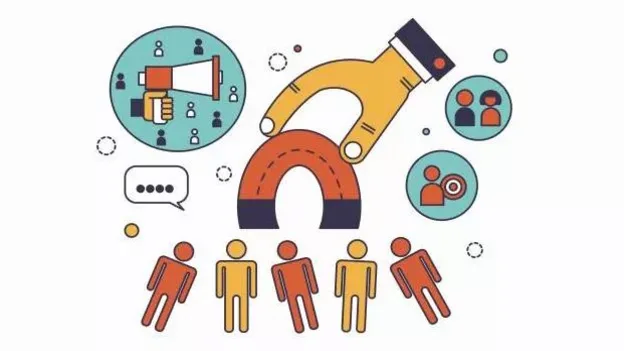

Stage 5: Enhanced Interviewing and Assessment:

NLP-powered Chatbots: Streamline initial interviews! Develop chatbots to gather information, assess basic skills, and conduct initial screening through automated conversations. Interview Transcript Analysis: Uncover hidden gems! Analyze interview transcripts using NLP techniques like sentiment analysis and topic modeling to identify key strengths, weaknesses, and cultural fit indicators. Feedback Analysis and Coaching: Empower both sides! Provide both interviewers and candidates with NLP-based feedback on communication skills, clarity, and overall interview performance

In [ ]:
import random

# Sample questions and options (categories: communication, problem-solving, resilience)
questions = {
    "Communication": {
        "Which statement best describes you as a communicator?": [
            "I prioritize clarity and conciseness.",
            "I adapt my communication style to different audiences.",
            "I enjoy fostering open and collaborative communication."
        ],
        "positive": ["Tell me about a situation where you effectively resolved a conflict through communication."],
        "negative": ["Can you share an example of a time when your communication approach might not have been optimal?"]
    },
    "Problem-Solving": {
        "When faced with a complex problem, you typically:": [
            "Analyze the situation thoroughly and develop a structured plan.",
            "Explore creative and innovative solutions.",
            "Seek input from others to brainstorm potential approaches."
        ],
        "positive": ["Describe a challenging problem you've solved and the steps you took to achieve success."],
        "negative": ["Can you tell me about a time when your problem-solving approach wasn't successful? What did you learn?"]
    },
    "Resilience": {
        "How do you typically handle setbacks or unexpected challenges?": [
            "I maintain a positive attitude and focus on finding solutions.",
            "I analyze the situation and learn from my mistakes.",
            "I seek support from my network and seek new motivation."
        ],
        "positive": ["Share an example of how you bounced back from a difficult experience in your career."],
        "negative": ["Can you describe a time when you struggled to overcome a setback? How did you eventually manage it?"]
    }
}

# Function to evaluate answer and personalize follow-up questions
def evaluate_and_follow(category, answer):
    if answer == questions[category]["positive"]:
        # Positive answer, ask positive follow-up
        return questions[category]["positive"]
    else:
        # Negative or neutral answer, ask negative follow-up
        return questions[category]["negative"]

# Start the interview
transcript = []
chatbot_intro = "Hello! I'm an AI chatbot here to conduct an initial interview. Let's get started with some multiple-choice questions."
transcript.append(chatbot_intro)
print(chatbot_intro)

# Randomly select categories and their options
selected_categories = random.sample(list(questions.keys()), 3)
for category in selected_categories:
    # Access question and options correctly
    question = list(questions[category].keys())[0]  # Get the first question
    options = questions[category][question]
    random.shuffle(options)  # Randomize option order for fairness

    transcript.append(f"{category}:\n{question}\n")
    print(f"\n{question}:")
    for i, option in enumerate(options):
        print(f"({chr(i + 65)}) {option}")  # Map options to uppercase letters for user input

    user_answer = input("> ").upper()  # Get user input
    while user_answer not in [chr(i + 65) for i in range(len(options))]:
        print("Invalid input. Please choose one of the options by entering the corresponding letter.")
        user_answer = input("> ").upper()

    user_answer_index = ord(user_answer) - 65
    transcript.append(f"Candidate: {options[user_answer_index]}\n")
    print(f"You chose: {options[user_answer_index]}\n")

    follow_up = evaluate_and_follow(category, options[user_answer_index])
    transcript.append(f"Chatbot: {follow_up}\n")
    print(follow_up)

    # Optional: additional answer input for follow-up questions
    if follow_up:
        response = input()
        transcript.append(f"Candidate: {response}\n")

# Output the full transcript
print("\nFull Interview Transcript:\n")
for line in transcript:
    print(line)



Hello! I'm an AI chatbot here to conduct an initial interview. Let's get started with some multiple-choice questions.

How do you typically handle setbacks or unexpected challenges?:
(A) I maintain a positive attitude and focus on finding solutions.
(B) I seek support from my network and seek new motivation.
(C) I analyze the situation and learn from my mistakes.
> I maintain a positive attitude and focus on finding solutions
Invalid input. Please choose one of the options by entering the corresponding letter.
> I analyze the situation and learn from my mistakes
Invalid input. Please choose one of the options by entering the corresponding letter.
> A
You chose: I maintain a positive attitude and focus on finding solutions.

['Can you describe a time when you struggled to overcome a setback? How did you eventually manage it?']
Yes

Which statement best describes you as a communicator?:
(A) I enjoy fostering open and collaborative communication.
(B) I adapt my communication style to diff

Stage 6 : Interview Transcript Analysis:

Keyword Spotting: Highlight keywords and phrases related to specific skills, experiences, and company values mentioned by the candidate. Sentiment Analysis: Analyze the transcript to gauge the candidate's overall interview experience, confidence, and enthusiasm. Topic Modeling: Identify key themes and areas of expertise discussed during the interview, providing deeper insights into the candidate's knowledge and potential contributions. Comparative Analysis: Compare transcripts from multiple candidates for the same position to identify consistent trends and biases in interviewer styles.

In [ ]:
import re

def clean_transcript(transcript):
  """
  Cleans the transcript by removing unnecessary greetings, introductions, and separators.

  Args:
      transcript: The raw interview transcript as a string.

  Returns:
      A list containing the conversation turns (questions, answers, and follow-ups).
  """
  cleaned_lines = []
  conversation_turn = []
  for line in transcript.splitlines():
    if line.strip():  # Remove empty lines
      if "Hello" in line or "initial interview" in line:
        continue  # Skip greetings and interview intro
      elif line.endswith(":"):
        conversation_turn.append(line.rstrip(":"))  # Question
      else:
        conversation_turn.append(line)  # Answer or follow-up
        cleaned_lines.append(conversation_turn)
        conversation_turn = []  # Reset turn for next conversation
  return cleaned_lines

def analyze_transcript(cleaned_transcript):
  """
  Analyzes the cleaned interview transcript.

  Args:
      cleaned_transcript: A list of conversation turns (questions, answers, and follow-ups).

  Prints:
      Insights about the interview, including skills and strengths.
  """
  skills = set()
  strengths = set()
  for turn in cleaned_transcript:
    question = turn[0]
    answer = turn[1]
    if "typically" in question.lower():  # Focus on general tendencies
      for word in answer.lower().split():
        if word in ["problem-solving", "teamwork", "communication"]:
          skills.add(word)
        elif word in ["resilience", "innovation", "learning"]:
          strengths.add(word)

  print("Skills Demonstrated:")
  if skills:
    print(*skills, sep=", ")  # Print each skill on a new line
  else:
    print("No skills explicitly mentioned in the chosen answers.")

  print("\nStrengths Highlighted:")
  if strengths:
    print(*strengths, sep=", ")
  else:
    print("No strengths explicitly mentioned in the chosen answers.")

# Example usage
transcript = """
Hello! I'm an AI chatbot here to conduct an initial interview... (rest of the transcript)
"""

cleaned_transcript = clean_transcript(transcript)
analyze_transcript(cleaned_transcript)


Skills Demonstrated:
No skills explicitly mentioned in the chosen answers.

Strengths Highlighted:
No strengths explicitly mentioned in the chosen answers.


Stage 6:

Making an Informed Choice: Candidate Evaluation and Selection:

Comprehensive Candidate Profiles: Get the whole picture! Combine NLP insights from various stages (resume, interview, etc.) to create comprehensive candidate profiles for holistic evaluation. Decision-making Support: Shine a light on the process! Implement Explainable AI (XAI) techniques to provide transparency into the decision-making process of NLP models during candidate selection. Fairness and Ethical Considerations: Foster equity! Develop clear guidelines and ethical considerations for NLP-based recruitment practices to ensure fairness and prevent bias in candidate selection.








#Part 2

Stage 1: Data Preparation:
Employee Skill Data: Develop or utilize existing resume parsing tools with Named Entity Recognition (NER) and text analysis to extract skills.

HR or employees to manually update and categorize skills in the employee database(explain in ppt)

Project Skill Requirements: Extract skills from project descriptions using NLP techniques similar to resume parsing. Allow manual input or selection from pre-defined skill taxonomies (e.g., ontologies).

Employee Availability: Integrate with existing project management tools to track current commitments and estimated completion dates. Consider factors like workload capacity, expertise level, and personal preferences. Utilize employee surveys or self-reported data.(explain in ppt)

In [ ]:
import spacy

# Load the English language model with NER
nlp = spacy.load("en_core_web_sm")

# Predefined list of skills you want to extract
skills_list = ["Python", "Machine Learning", "Data Science", "Web Development", "SQL", "AWS", "Communication", "Leadership"]

def extract_skills_from_text(text):
    """
    Extracts skills from a text using spaCy NER and compares them with a predefined list.

    Args:
      text: The text to extract skills from (e.g., resume text).

    Returns:
      A list of extracted skills.
    """
    doc = nlp(text)
    extracted_skills = []

    # Iterate through entities and check if they match skills in the list
    for token in doc:
        if token.text in skills_list:
            extracted_skills.append(token.text)

    return extracted_skills

# Example usage
resume_text = """
John Doe
Software Engineer

Summary
Experienced software engineer with a strong background in Python and machine learning. Proficient in building web applications and working with cloud platforms like AWS. Excellent communication and leadership skills.

Skills
Python, Machine Learning, Data Science, SQL, AWS

Experience
* Software Engineer at Acme Inc. (2020-Present)
* Data Scientist at XYZ Company (2018-2020)

Education
* Master of Science in Computer Science - University of California, Berkeley (2018)
* Bachelor of Science in Computer Science - Massachusetts Institute of Technology (2016)
"""

extracted_skills = extract_skills_from_text(resume_text)
print("Extracted skills:", extracted_skills)


Extracted skills: ['Python', 'AWS', 'Python', 'SQL', 'AWS']


#Stage 2 : Find the perfect fit for the role

In [ ]:
import random

# Define a class to represent an employee
class Employee:
  def __init__(self, name, skills, availability, past_performance, cultural_fit):
    self.name = name
    self.skills = skills  # Set of skills
    self.availability = availability  # Hours per day available (out of 8)
    self.past_performance = past_performance  # Rating (1-10)
    self.cultural_fit = cultural_fit  # Score (0.1-0.9)

# Sample employee data
employees = [
  Employee("Alice", {"python", "machine learning"}, 6, 7, 0.7),
  Employee("Bob", {"java", "c++", "machine learning"}, 6, 7, 0.7),
  Employee("Charlie", {"javascript", "web development"}, 8, 9, 0.9),
  Employee("David", {"data analysis", "statistics"}, 5, 8, 0.6),
]

# Define the job role requirements
job_role = {
  "required_skills": {"python", "machine learning"},
  "min_availability": 6,
  "min_past_performance": 7,
  "min_cultural_fit": 0.7,
}

def match_candidates(employees, job_role):
  """
  Matches employees with a job role based on skills, availability, past performance, and cultural fit (no recursion).

  Args:
      employees: A list of Employee objects.
      job_role: A dictionary containing job role requirements.

  Returns:
      The best matched employee (considering all factors) or None if no match.
  """

  # Filter by required skills
  filtered_employees = [emp for emp in employees if job_role["required_skills"].issubset(emp.skills)]

  # No candidates with required skills
  if not filtered_employees:
      return None

  # Initialize best candidate and best score
  best_candidate = filtered_employees[0]
  best_score = 0.0

  # Calculate score and identify the best match
  for emp in filtered_employees:
    score = 0.0
    skill_weight = 0.4
    availability_weight = 0.2
    performance_weight = 0.2
    cultural_fit_weight = 0.2

    # Skill match level (expertise): Calculate weighted Jaccard similarity
    skill_intersection = len(emp.skills.intersection(job_role["required_skills"]))
    skill_union = len(emp.skills.union(job_role["required_skills"]))
    score += skill_weight * (skill_intersection / skill_union if skill_union > 0 else 0)

    # Availability
    score += availability_weight * (emp.availability / job_role["min_availability"] if emp.availability >= job_role["min_availability"] else 0)

    # Past performance
    score += performance_weight * (emp.past_performance / job_role["min_past_performance"] if emp.past_performance >= job_role["min_past_performance"] else 0)

    # Cultural fit
    score += cultural_fit_weight * (emp.cultural_fit / job_role["min_cultural_fit"] if emp.cultural_fit >= job_role["min_cultural_fit"] else 0)

    # Update best candidate if current score is higher
    if score > best_score:
      best_candidate = emp
      best_score = score

  return best_candidate

matched_candidate = match_candidates(employees, job_role)

if matched_candidate:
  print("Best Matched Candidate:")
  print({matched_candidate.name})
else:
  print("No candidates matched the job requirements.")


Best Matched Candidate:
{'Alice'}


Stage 3  : Develop a process for project managers to input project requirements and view recommended candidates. Integrate with existing HR and project management systems for seamless data flow. Implement feedback mechanisms for users to provide feedback on the recommendations and improve the system's accuracy.